In [51]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [53]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [54]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [55]:
# Get the columns and the rows that are not null. or city_data_df.info()
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [56]:
# To make sure there are no null values, get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [57]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

Finally, we'll check to see how many data points there are for each type of city. To do this, we'll use the sum() method on the city_data_df for the type column where the condition equals each city in the DataFrame.
We can use the unique() method on a specific column, which will return an array, or list, of all the unique values of that column

In [58]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [59]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [60]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [61]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [62]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [63]:
# To make sure there are no null values, get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [64]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [65]:
# Combine the data into a single dataset
PyBer_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

# Display the DataFrame
PyBer_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


Here are the steps to create a bubble chart:
To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.

In [66]:
# Create three separate DataFrames, one for each type of city.
urban_cities_df = PyBer_data_df[PyBer_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [67]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = PyBer_data_df[PyBer_data_df["type"] == "Suburban"]
rural_cities_df = PyBer_data_df[PyBer_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


To get the number of rides for each city by each type of city, we have to create a Series where the index is the name of the city and the column is the number of rides for that city.
Using the groupby() function can be used to group large amounts of data when we want to compute mathematical operations on these groups.

In [68]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [69]:
# Get the number of rides for Suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [70]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [71]:
# Get average fare for each city in the urban cities.
urban_ave_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_ave_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [72]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head() 

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [73]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head() 

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

Now we have two of three datasets we need to create a bubble chart. Next, we'll use the groupby() function on the city type DataFrames to get the average number of drivers for each city type. This will be our third and final dataset.

In [74]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [75]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()


city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [76]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

Our first task will be to create a scatter plot for each type of city where the following conditions are met:

-The x-axis is the number of rides for each city.
-The y-axis is the average fare for each city.
-The size of each marker is the average number of drivers in each city.

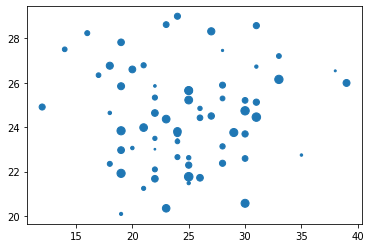

In [78]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_ave_fare, s=urban_driver_count)

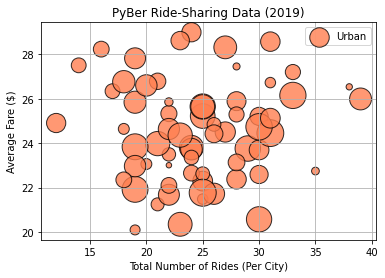

In [80]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_ave_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

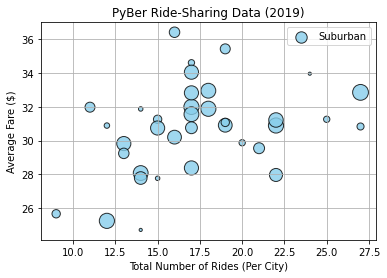

In [81]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

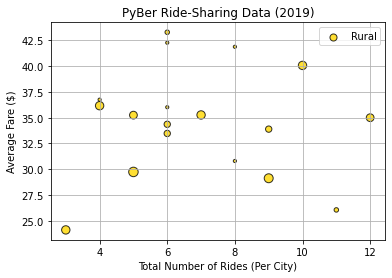

In [82]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

To create a bubble chart that showcases all the different city types in one chart, we'll combine our three scatter plot code blocks in one Jupyter Notebook cell.

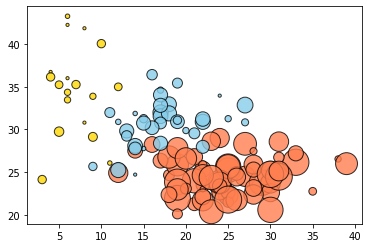

In [84]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_ave_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

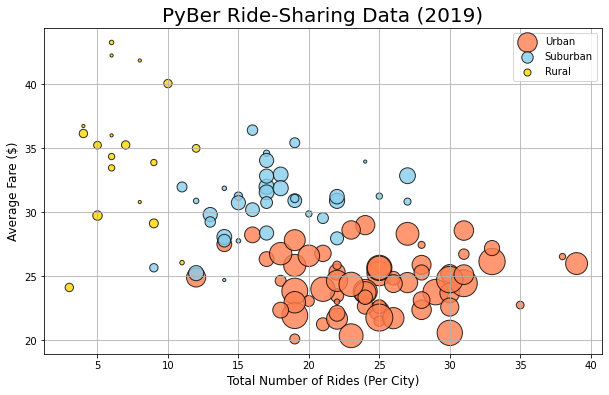

In [86]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_ave_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

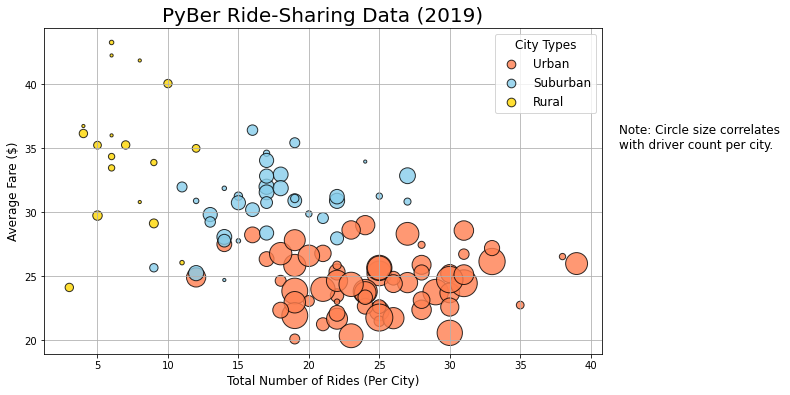

In [90]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_ave_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size. # 42 and 35 are coordinates based on the chart coordinates 
# We can see that our chart has a width (i.e., x, between 0 and 42; and y, between 18 and 50). 
# Our x position can be 42, and the y position can be in the middle, 32–35.
plt.text(42, 35, "Note: Circle size correlates \nwith driver count per city.", fontsize="12")

# Show the plot
plt.show()

In [98]:
# Save the figure.
plt.savefig('Fig1.png')

<Figure size 432x288 with 0 Axes>

In [99]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [100]:
# Get summary statistics.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [101]:
# Get summary statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


Now let's calculate the summary statistics of the ride count for each city type.

In [102]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [103]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [104]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [107]:
# Calculate the mean of the ride count for "urban" city type. If you want just mean()
round(urban_ride_count.mean(),2) 


24.62

In [106]:
# Calculate the mean of the ride count for "suburban" city type.
round(suburban_ride_count.mean(),2)

17.36

In [108]:
# Calculate the mean of the ride count for "rural" city type.
round(rural_ride_count.mean(),2)

6.94

In [109]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [110]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [111]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

In [112]:
# Import NumPy and the stats module from SciPy. Another method for mean(), median() and mode() using numpy
import numpy as np
import scipy.stats as sts # this dependency is imprting for mode()

In [113]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [115]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [116]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


perform the summary statistics for the average fare for each city type, we'll need to get the data from the "fare" column in each city type DataFrame.

In [119]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [120]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [121]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [122]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [123]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [124]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


perform summary statistics for the number of drivers by city type, we need to create a Series for each city type based on the driver_count column in each city type DataFrame.

In [125]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [126]:
# Get the driver count data from the urban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [127]:
# Get the driver count data from the urban cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [128]:
# Calculate the measures of central tendency for the average drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers for urban trips is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers for urban trips is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers for urban trips is {mode_urban_drivers}.")

The mean drivers for urban trips is $36.68.
The median drivers for urban trips is $37.00.
The mode drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [129]:
# Calculate the measures of central tendency for the average drivers for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers for suburban trips is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers for suburban trips is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers for suburban trips is {mode_suburban_drivers}.")

The mean drivers for suburban trips is $13.71.
The median drivers for suburban trips is $16.00.
The mode drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [130]:
# Calculate the measures of central tendency for the average drivers for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers for rural trips is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers for rural trips is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers for rural trips is {mode_rural_drivers}.")

The mean drivers for rural trips is $4.30.
The median drivers for rural trips is $4.00.
The mode drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


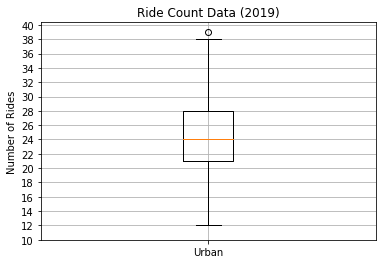

In [131]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

Looking at this box-and-whisker plot, we can see:

There is at least one outlier, which is close to 40. This our maximum data point, 39.
The minimum is 12.
The median is 24 or the 50th percentile.
The standard deviation is about 5 because the box upper and lower boundaries represent the upper and lower quartiles.

In [132]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

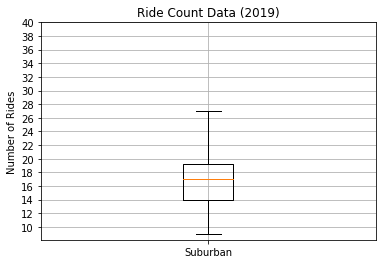

In [133]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

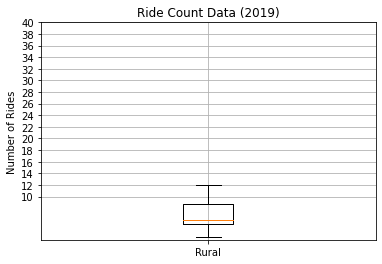

In [134]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

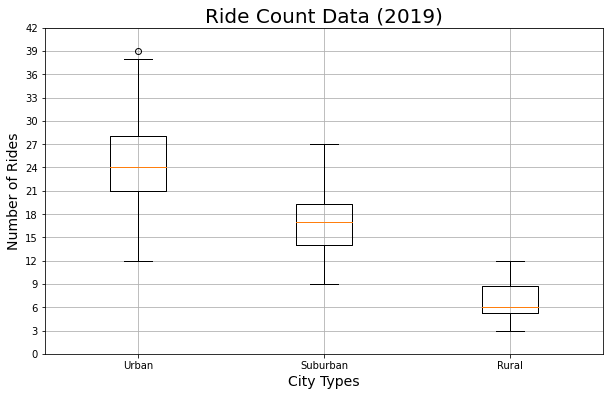

In [136]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Fig2.png")
plt.show()

There is one outlier in the urban ride count data. 
Also, the average number of rides in the rural cities is about 4- and 3.5-times lower per city than the urban and suburban cities, respectively.

In [138]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [139]:
# Get the city that matches 39. # Finding outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Let's create box-and-whisker plots for the ride fare data with summary statistics.

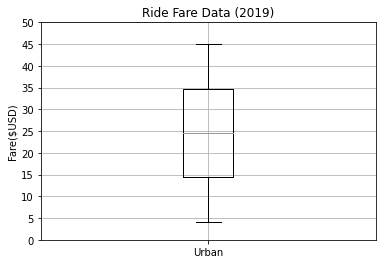

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [140]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

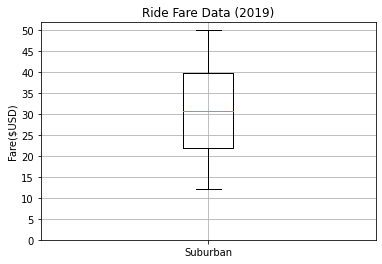

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [141]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

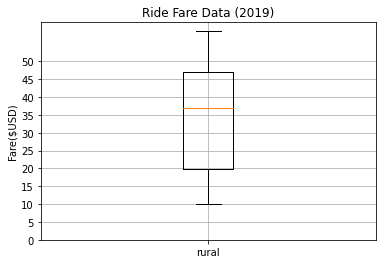

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [142]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

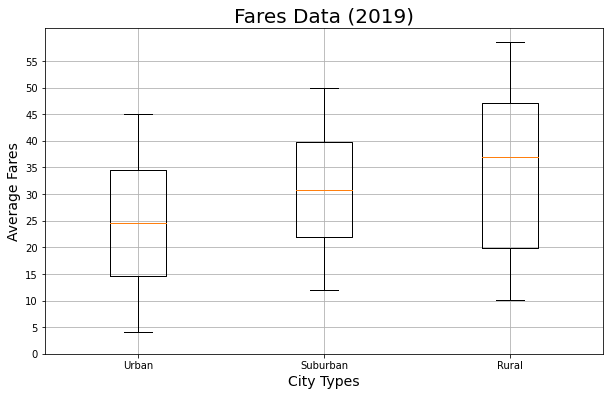

In [145]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Fares Data (2019)',fontsize=20)
ax.set_ylabel('Average Fares',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Fig3.png")
plt.show()

# Finding:
From the combined box-and-whisker plots, we see that there are no outliers. However, the average fare for rides in the rural cities is about $11 and $5 more per ride than the urban and suburban cities, respectively. Why do you think there is such a big difference? By looking at the number of riders for each city, can you get a sense of the overall revenue?

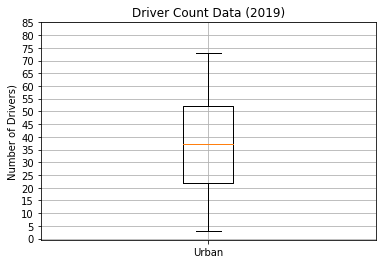

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [146]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

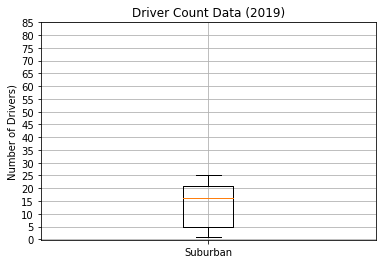

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [147]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

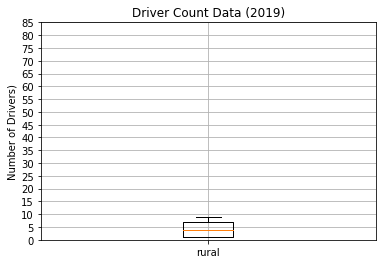

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [148]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

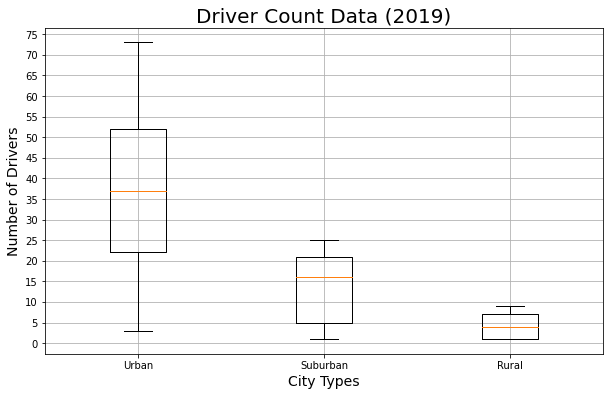

In [152]:
# Add all drivers count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
Drivers_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(Drivers_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Fig4.png")
plt.show()

# Finding:
The average number of drivers in rural cities is nine to four times less per city than in urban and suburban cities, respectively. By looking at the driver count data and fare data, can you get a sense of the overall revenue?